In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.datasets
import sklearn.neighbors
import sklearn.datasets
import sklearn.metrics

In [2]:
#Gettting our data
df = pd.read_csv('cfd.csv')
df.columns = df.columns.str.lower()
df.head()

,target,race,gender,age,numberofraters,female_prop,male_prop,asian_prop,black_prop,latino_prop,...,eyeshape,eyesize,upperheadlength,midfacelength,chinlength,foreheadheight,cheekboneheight,cheekboneprominence,faceroundness,fwhr
0,AF-200,A,F,32.571429,28,1.000000,0.000000,1.000000,0.000000,0.000000,...,0.404651,0.060924,0.414099,0.326797,0.130719,0.264706,0.388189,91.5,0.545752,1.921146
1,AF-201,A,F,23.666667,27,1.000000,0.000000,0.962963,0.000000,0.000000,...,0.329204,0.041892,0.414414,0.329279,0.144595,0.300901,0.383784,146.0,0.488288,1.901129
2,AF-202,A,F,24.448276,29,0.827586,0.172414,0.310345,0.068966,0.137931,...,0.357939,0.051586,0.411080,0.310317,0.173424,0.298475,0.397029,58.0,0.481333,1.888249
3,AF-203,A,F,22.758621,29,1.000000,0.000000,0.758621,0.000000,0.068966,...,0.443200,0.063913,0.354407,0.343793,0.169820,0.272266,0.421089,87.5,0.500231,1.863719
4,AF-204,A,F,30.137931,29,1.000000,0.000000,0.827586,0.000000,0.068966,...,0.432247,0.053435,0.438931,0.293045,0.180237,0.293893,0.371925,73.5,0.513571,1.935783


In [3]:
#Getting our X and Y
feat_list = ['babyface', 'numberofraters', 'eyesize', 'faceroundness']
X = df['babyface'].to_numpy(), df['numberofraters'].to_numpy(), df['eyesize'].to_numpy(), df['faceroundness'].to_numpy()
y = list(df['gender'])
y = [0 if j == 'F' else 1 for j in y]

In [4]:
def show_decision_surface(model, X, y):
    """
    Helper function to visualize the decision surface of model
    :param model: Initialized KNNClassifier
    :return: None
    """
    x_min, x_max = X[:, 0].min()-1, X[:, 0].max()+1
    y_min, y_max = X[:, 1].min()-1, X[:, 1].max()+1
    x_grid = np.arange(x_min, x_max, 0.1)
    y_grid = np.arange(y_min, y_max, 0.1)
    xx, yy = np.meshgrid(x_grid, y_grid)
    r1, r2 = xx.reshape(-1,1), yy.reshape(-1,1)
    grid = np.hstack((r1,r2))
    y_hat = model.predict(grid)
    zz = y_hat.reshape(xx.shape)
    plt.contourf(xx, yy, zz, cmap='PiYG')
    plt.scatter(X[:,0], X[:,1], c=y)
    plt.show()

Feature:  babyface   Predicting: gender
Accuracy =  0.6063651591289783


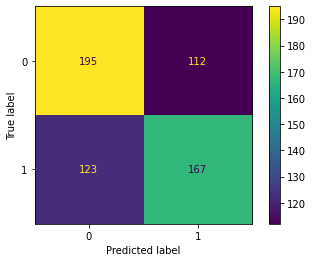

Feature:  numberofraters   Predicting: gender
Accuracy =  0.541038525963149


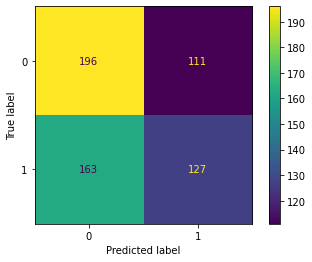

Feature:  eyesize   Predicting: gender
Accuracy =  0.6398659966499163


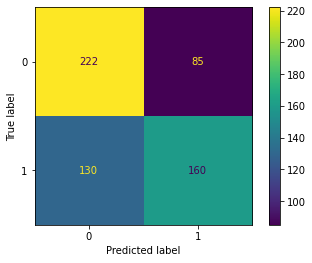

Feature:  faceroundness   Predicting: gender
Accuracy =  0.6465661641541038


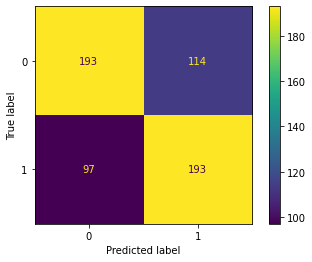

In [5]:
#Fitting a model on each of the X's
for i in range(len(feat_list)):
    x_0 = X[i]
    new_x = x_0[:, np.newaxis]
    model = sklearn.neighbors.KNeighborsClassifier(n_neighbors=15)
    model = model.fit(new_x, y)
    #show_decision_surface(model, new_x, y)
    y_pred = model.predict(new_x)
    conf = sklearn.metrics.confusion_matrix(y, y_pred)
    print('Feature: ', feat_list[i], '  Predicting: gender')
    print("Accuracy = ", ((conf[0][0] + conf[1][1]) / len(y)))
    disp = sklearn.metrics.ConfusionMatrixDisplay(conf)
    disp.plot()
    plt.show()


In [6]:
from sklearn.preprocessing import LabelEncoder# Need both of these for the transform from categorical to numeric
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

from pandas.api.types import is_string_dtype# For checking if a pandas column is a string or not
from pandas.api.types import is_numeric_dtype

In [7]:
encoder = LabelEncoder() # Now we get a categorical type and transform a certain column to numeric values
df['race'] = encoder.fit_transform(df['race'].astype('str'))
race_df = df.race
print(df['race'])
one_hot = pd.get_dummies(race_df, columns = ['race'], prefix=['race'])#Once we have the numerics we do one hot encoding

0      0
1      0
2      0
3      0
4      0
      ..
592    3
593    3
594    3
595    3
596    3
Name: race, Length: 597, dtype: int64


In [8]:
print(one_hot)#One hot encoding essentially adds in 0's for when the race isn't true and 1's for when it is

     ['race']_0  ['race']_1  ['race']_2  ['race']_3
0             1           0           0           0
1             1           0           0           0
2             1           0           0           0
3             1           0           0           0
4             1           0           0           0
..          ...         ...         ...         ...
592           0           0           0           1
593           0           0           0           1
594           0           0           0           1
595           0           0           0           1
596           0           0           0           1

[597 rows x 4 columns]


In [9]:
scale = StandardScaler()
print(scale.fit_transform(one_hot))

[[ 2.11590742 -0.70178344 -0.46995627 -0.6648526 ]
 [ 2.11590742 -0.70178344 -0.46995627 -0.6648526 ]
 [ 2.11590742 -0.70178344 -0.46995627 -0.6648526 ]
 ...
 [-0.47261047 -0.70178344 -0.46995627  1.50409278]
 [-0.47261047 -0.70178344 -0.46995627  1.50409278]
 [-0.47261047 -0.70178344 -0.46995627  1.50409278]]


In [10]:
def categorical_transform(feature, name):
    '''Function for transforming a categorical feature into a numeric one
       Parameters: Feature - incoming categorical feature of strings, Name - name of the feature
       Returns: one_hot - a one hot encoding of the feature
       Notes: Can use scale and standard scalar to change from binary values'''
    
    encoder = LabelEncoder() # Now we get a categorical type and transform a certain column to numeric values
    feature = encoder.fit_transform(feature.astype('str'))
    one_hot = pd.get_dummies(feature, columns = name, prefix=name)#Once we have the numerics we do one hot encoding
    #scale = StandardScaler()
    
    #new_vals = scale.fit_transform(one_hot)
    #one_hot = pd.DataFrame(new_vals, columns = one_hot.columns)
    return(one_hot)

In [11]:
faces_df = pd.read_csv('cfd.csv')
faces_df.columns = faces_df.columns.str.lower()
print(categorical_transform(faces_df['race'], 'race'))

     race_0  race_1  race_2  race_3
0         1       0       0       0
1         1       0       0       0
2         1       0       0       0
3         1       0       0       0
4         1       0       0       0
..      ...     ...     ...     ...
592       0       0       0       1
593       0       0       0       1
594       0       0       0       1
595       0       0       0       1
596       0       0       0       1

[597 rows x 4 columns]


In [12]:
def compose_df(feature_list, df):
    '''Function for getting the dataframe to perform clustering on
       Parameters: Feature_list - incoming list of features, df - master dataframe
       Returns: return_frame - a df containing are selected numeric values
       '''
    return_frame = pd.DataFrame()
    for feature in feature_list:
        if is_string_dtype(df[feature]):
            new_df = categorical_transform(df[feature], feature)
            return_frame = pd.concat([return_frame, new_df], axis=1)
        else:
            return_frame[feature] = df[feature]
    
    scale = StandardScaler()
    
    new_vals = scale.fit_transform(return_frame)
    return_frame = pd.DataFrame(new_vals, columns = return_frame.columns)
    
    return(return_frame)
            

In [13]:
feat_list = ['race', 'gender', 'faceroundness', 'eyesize']
print(compose_df(feat_list, faces_df))

       race_0    race_1    race_2    race_3  gender_0  gender_1  \
0    2.115907 -0.701783 -0.469956 -0.664853  0.971918 -0.971918   
1    2.115907 -0.701783 -0.469956 -0.664853  0.971918 -0.971918   
2    2.115907 -0.701783 -0.469956 -0.664853  0.971918 -0.971918   
3    2.115907 -0.701783 -0.469956 -0.664853  0.971918 -0.971918   
4    2.115907 -0.701783 -0.469956 -0.664853  0.971918 -0.971918   
..        ...       ...       ...       ...       ...       ...   
592 -0.472610 -0.701783 -0.469956  1.504093 -1.028893  1.028893   
593 -0.472610 -0.701783 -0.469956  1.504093 -1.028893  1.028893   
594 -0.472610 -0.701783 -0.469956  1.504093 -1.028893  1.028893   
595 -0.472610 -0.701783 -0.469956  1.504093 -1.028893  1.028893   
596 -0.472610 -0.701783 -0.469956  1.504093 -1.028893  1.028893   

     faceroundness   eyesize  
0         1.347102  1.576844  
1         0.376713 -0.990828  
2         0.259255  0.316965  
3         0.578386  1.980073  
4         0.803661  0.566468  
..       

In [14]:
def clustering(df, k, feature_list):
    df = compose_df(feature_list, df)
    
    pca = PCA().fit(df)
    reduced_x = pca.transform(df)
    
    kmeans = KMeans(n_clusters = k)
    km = kmeans.fit_predict(reduced_x)

    colors = ['red', 'blue', 'green', 'orange', 'purple', 'black', 'yellow', 'grey', 'brown', 'pink']
    for i in range(len(np.unique(km))):
        plt.scatter(reduced_x[km==i, 0],reduced_x[km==i, 1],s=25,c=colors[i],label='Cluster1')
        
    plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='magenta',label='Centroids')

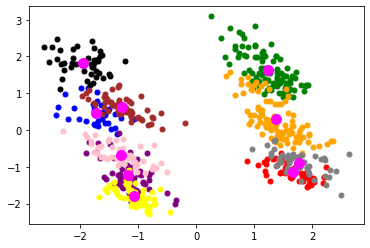

In [15]:
clustering(faces_df, 10, feat_list)